<a href="https://colab.research.google.com/github/JoDeMiro/LuaLisa/blob/main/Lua_Lisa_08_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Van egy alapvető észrevételem az egésszel kapcsolatban

A körök maximális méretét ugyan kontrollálni tudom a beállításon keresztül<br>
mégis az az észrevétel, hogy a nagyobb körök jobb eredményt adnak ami az illeszkedés<br>
mértékét illetti, ugyannakor az emberi szem és az értelmezhetőség szempontjából<br>
rosszabb.

Ennek a jelenségnek az áll a hátterében, hogy mivel pixelenként van kiszámolva<br>
az eltérés az eredeti és a generált kép között a nagy, homogén területetket<br>
előnyben részesíti az algoritmus.<br>
Ugyanakkor ezáltal az algoritmus szempontjából lényegtelenné válanak az apró<br>
részletek, a finom élek, az éles átmenetek.<br>
Holott nekünk emberek számára pontosan ezek hordozzák a lényegi információt.

Ezért valahogy be kéne építenem az egészebe, hogy ezek az éles átmenetek se<br>
vesszenek el.

Erre most még nincs jó ötletem. Hieszen a lényeg pont az lenne, hogy a körök határai<br>
ott legyenek ahol ezek az éles átmenetek elő fordulnak.

Az biztos, hogy a körök sorrendjének, vagyis megjelenésük, átfedésük sorrendjével,<br>
a rétegek sorrendjével érdemes lenne játszanom.

Vagyis néha ez is a mutáció része lehet. Ami most fix és eleve adott.<br>
Ezért néha véletlen szerűen ki lehetne választani két kört amelyek sorrendjét<br>
tehát a listában elfoglalt pozicióját felcseréljük, és megmérjük, hogy jobb megoldást adott-e.<br>
Ha nem akkor nyilván nem öröklődik tovább.

Fontos, hogy ez is legyen paraméter (1) hogy a populáción belül milyen gyakran forduljon elő<br>
ez a swap. (2) vagy hogy hány generációnként forduljon elő ez a swap.<br>
Azt hiszem az előző megoldás logikailag következetesebb.

A mutáció elfordulását ne rendeljem a generáció számához.<br>
Azt kezeljem sima valószínűségként a populáció szintjén.<br>
Magyarul kérjek egy véletlenszámot és ha ez egy megadott érték alatt van akkor swappoljon.

**Ugyanakkor**

Ez az egész amit itt leírtam továbbra sem oldaj meg azt a problémát, hogy a nagy<br>
homogén területeket továbbra is előnyben fogja részesíteni és megpróbálja ezek feltölteni.

Ugyanakkor ha hagyom, hogy csináljon nagy köröket, amelyek akár az egész képet lefedik<br>
és tudom variálni az átfedésekk sorrendjét akkor lehet, hogy ez a probélma megszűnik.

In [4]:
import numpy as np

import os
import time
import math 
import pickle
import random

import sklearn
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

import skimage.io
import skimage.transform

from copy import deepcopy

from skimage.draw import ellipse

from IPython.display import clear_output


In [5]:
id = np.arange(0, 1, 0.1)
id = np.linspace(0, 1, 100)
beta = 3
y1 = np.sin(id) * beta
y2 = np.sin(id * beta)

print(id.shape)
print(y1.shape)

(100,)
(100,)


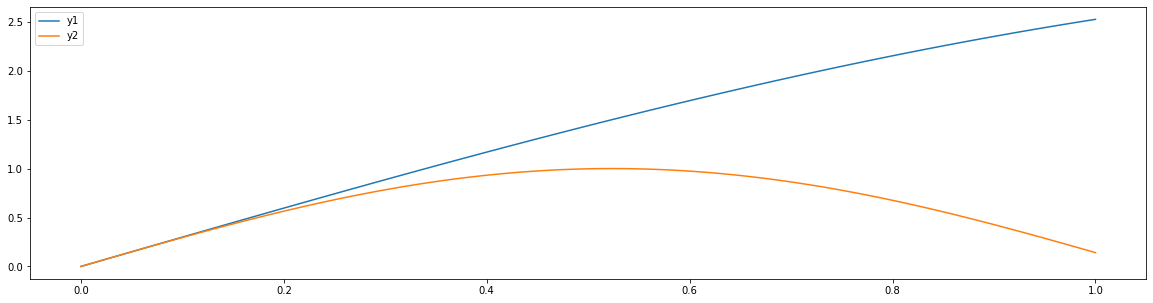

In [6]:
plt.figure(figsize=(20, 5))
plt.plot(id, y1, label='y1')
plt.plot(id, y2, label='y2')
plt.legend()
plt.show()

(100, 1)
(100,)


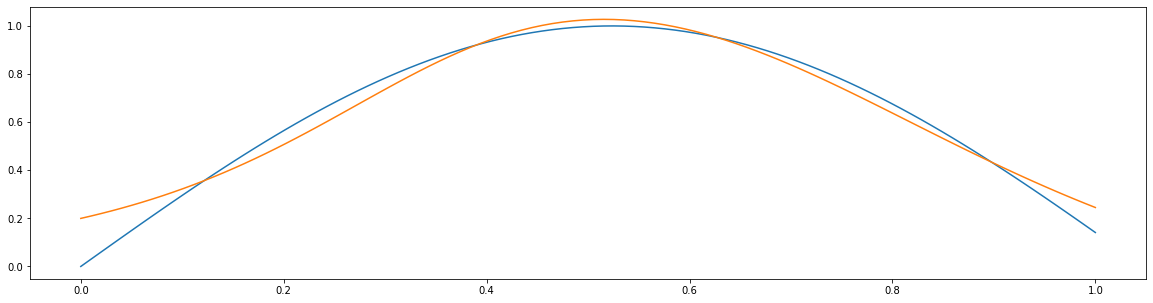

In [7]:
mlp = MLPRegressor(hidden_layer_sizes=(3,2),
                   activation='tanh',
                   solver='adam',
                   batch_size=100,
                   learning_rate_init=0.1,
                   max_iter=200,
                   shuffle=True,
                   random_state=1)

def sin(id = None, beta = None):
  sinus = id * beta
  return beta

input = id.reshape(-1,1)
target = y2
print(input.shape)
print(target.shape)

mlp.fit(input, target)

pred = mlp.predict(input)

plt.figure(figsize=(20, 5))
plt.plot(id, y2, label='y2')
plt.plot(id, pred, label='pred')
plt.show()

## Evoluciós módszerrel keressük a megfelelő paramtéert

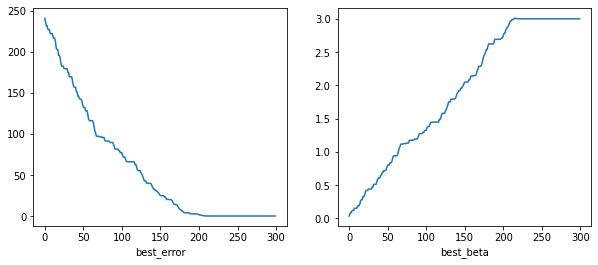

In [8]:
def lathatatlan_fuggveny(id, beta):
  return np.sin(id) * beta

id = np.linspace(0, 1, 100)

beta_amit_keresünk = 3
y1 = lathatatlan_fuggveny(id, beta_amit_keresünk)

decay = 0.1

best_beta_holder  = []
best_error_holder = []
best_beta  = 0
best_error = 99999999
for i in range(300):
  current_beta = best_beta + ((-0.5 + np.random.random()) * decay)
  pred  = lathatatlan_fuggveny(id, current_beta)
  error = np.sum((pred-y1)**2)
  error = float(error)
  if error < best_error:
    best_beta = current_beta
    best_error = error
  best_error_holder.append(best_error)
  best_beta_holder.append(best_beta)
  # print('best_error = {:.3}, best_beta = {:.2} '.format(best_error, best_beta))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(best_error_holder)
ax1.set_xlabel('best_error')
ax2.plot(best_beta_holder)
ax2.set_xlabel('best_beta')
plt.show()

## Lua Lisa

<class 'numpy.ndarray'>
(444, 788, 3)
min 6 and max 227
uint8
uint8
(440, 784)


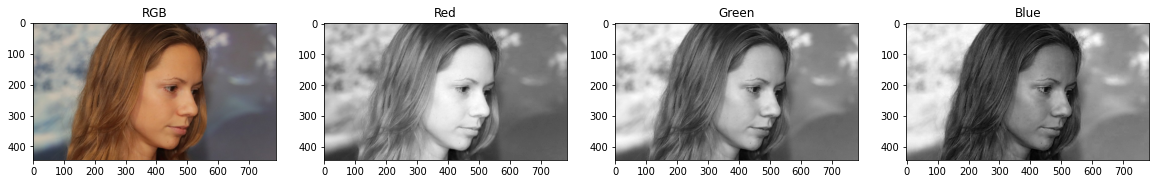

In [9]:
pic1 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman4.jpg')

print(type(pic1))

print(pic1.shape)

red1   = pic1[:-4, :-4, 0]
green1 = pic1[:-4, :-4, 1]
blue1  = pic1[:-4, :-4, 2]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic1, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red1, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green1, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue1, cmap='gray'); ax4.set_title('Blue')

print('min {} and max {}'.format(red1.min(), red1.max()))
print(pic1.dtype)
print(red1.dtype)
print(red1.shape)

plt.show()

min 0.054901960784313725 and max 2.2627450980392156 and shape (440, 784)


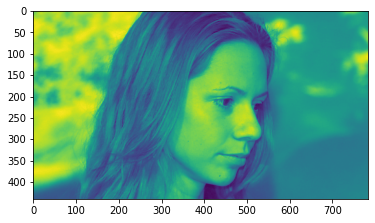

In [10]:
r = red1.astype('float64')
g = green1.astype('float64')
b = blue1.astype('float64')

gray = (r + g + b).astype('float64')

gray = gray/255.0
print('min {} and max {} and shape {}'.format(gray.min(), gray.max(), gray.shape))
plt.imshow(gray)

(110, 196)


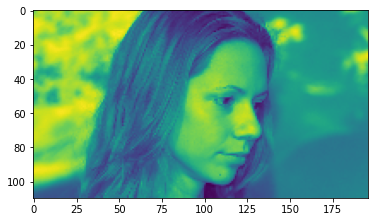

In [11]:
gray = skimage.transform.rescale(gray, 0.25, anti_aliasing=False)

plt.imshow(gray)

print(gray.shape)


## Pilot Cont. 1

In [12]:
abc = 0.1

abc = 0 if abc < 0 else abc

abc

0.1

In [13]:
aa, bb = 10, 2
print(aa, bb)

10 2


In [14]:
abc = [{'radius': 10, 'value': 2}, {'radius': 3, 'value': 1}, {'radius': 2, 'value': 20}]

print(abc)

newlist = sorted(abc, key=lambda d: -d['radius'])

print(abc)
print(newlist)

[{'radius': 10, 'value': 2}, {'radius': 3, 'value': 1}, {'radius': 2, 'value': 20}]
[{'radius': 10, 'value': 2}, {'radius': 3, 'value': 1}, {'radius': 2, 'value': 20}]
[{'radius': 10, 'value': 2}, {'radius': 3, 'value': 1}, {'radius': 2, 'value': 20}]


In [122]:
class Evolution:

  def __init__(self, original_image):
    self.original_image = original_image
    self.height = self.original_image.shape[0]
    self.width  = self.original_image.shape[1]
    print('self.height =', self.height)
    print('self.width  =', self.width)
    self.best_error = 999999999999.0
    self.since = 0
    self.save_image = False
    self.best_solution_history = []
    pass

  # ------- Segéd függvény a hibához ------
  def calc_distace(self, original_image, created_image):
    err = np.sum((original_image - created_image)**2)
    return err

  # ------- Segéd függvény az ábrához ----
  def show_solution(self, solution, i = 0, save = False):
    p_img = np.zeros((self.height, self.width), dtype=np.float64)

    # Menjünk végig az összes körön
    for circle in solution:
      _r = circle.get('_r')
      _c = circle.get('_c')
      _rr = _cr = circle.get('_rr')
      _value = circle.get('_value')

      rr, cc = ellipse(r=_r, c=_c, r_radius=_rr, c_radius=_cr)

      # ha kilóg a képből akkor le kell vágni
      rr[rr >= self.height] = self.height-1                   # <-- a row a magasság
      cc[cc >= self.width] = self.width-1                     # <-- a col a szélesség
      rr[rr < 0] = 0
      cc[cc < 0] = 0

      p_img[rr, cc] = _value                        # <-- adjuk hozzá a kört a képhez a megfelelő pixel intenzitással [value]

    plt.figure(figsize=(6.5, 4.9))
    # plt.figure(figsize=(8, 5))                    # <-- ha nem ilyen arányban van az ffmpeg elhasan (not divide by 2)
    plt.imshow(p_img, cmap='gray');                 # <-- show image
    plt.savefig('image' + '_{0:04}'.format(i)+'.png', bbox_inches='tight')
    plt.show() 
    plt.close('all')


  # ------- Segéd függvény a hibához -----
  def show_history(self):
    plt.figure()
    plt.plot(self.error_history)
    plt.plot(self.best_error_history)
    plt.show()

  # ------- Segéd függvény a betöltéshez -
  def load_archived_model(self):
    cmd = 'wget https://github.com/JoDeMiro/LuaLisa/raw/main/best_solution.pkl'
    os.system(cmd)
    with open('best_solution.pkl', 'rb') as f:
      loaded_best_solution = pickle.load(f)
      self.best_solution = loaded_best_solution
      self.best_error = 999999999999.0                                              # <-- le kell resetelni a best_error értékét
      self.best_solution_history = []                                               # <-- le kell resetelni


  # ------- Create initial solution -------
  def init_solution(self, number_of_cirles, min_circle_radius, max_circle_radius):
    print('------------------- init_solution -----------------')
    self.number_of_cirles = number_of_cirles
    self.min_circle_radius = min_circle_radius
    self.max_circle_radius = max_circle_radius

    solution = []
    individum = {}
    for i in range(self.number_of_cirles):
      _r = np.random.randint(low = 0, high = self.height-2)    # <-- 788
      _c = np.random.randint(low = 0, high = self.width-2)     # <-- 444
      _rr = _cr = np.random.randint(low = self.min_circle_radius, high = self.max_circle_radius)
      _value = np.random.rand()                           # <-- 0-1
      individum = {'_r': _r, '_c': _c, '_rr': _rr, '_cr': _cr, '_value': _value}
      solution.append(individum)

    self.initial_solution = solution
    self.best_solution = solution


  # ------- Setup evolution  --------------
  def setup_evolution(self, rf_r, rf_c, rf_rr, rf_v):
    self._rf_r = rf_r
    self._rf_c = rf_c
    self._rf_rr = rf_rr
    self._rf_v = rf_v


  # ------- Start evolution --------------
  def run_evolution(self,
                    immediately_update = True,
                    generation = 10,
                    population = 20,
                    selection_rate = 1.0,
                    z_order_selection_rate = 0.0,
                    z_ordered = False,
                    print_every_solution_result = False,
                    show_time = 50) -> str:

    start_time = time.time()

    # best_solution = deepcopy(self.initial_solution)
    best_solution = deepcopy(self.best_solution)                                  # <-- az initben létrehozzuk : self.best_solution = soloution
    best_error = self.best_error                                                  # <-- ha nem példányosítjuk újra akkor az elöző futásból megmaradt

    best_img = None
    error_history = []
    best_error_history = []

    for g in range(generation):

      # olvassuk be a solutiont -> mutáljuk -> és csináljuk meg ez a alpján a becslést
      
      for p in range(population):

        p_img = np.zeros((self.height, self.width), dtype=np.float64)

        current_solution = []
        individum = {}

        if( z_ordered == True ):
          # Sortoljuk a listát a körök átmérője szerint
          z_ordered_best_solution = sorted(best_solution, key=lambda d: -d['_rr'])        # <-- fontos hogy - mert a nagyok legyenek elől
          best_solution = z_ordered_best_solution


        # Menjünk végig az összes körön
        factor = np.random.rand()                                                         # <-- ad egy véletlen számot ennyivel módosítom a határokat
        for circle in best_solution:
          rnd_for_circle = np.random.rand()
          mutate_circle  = True if rnd_for_circle <= selection_rate else False
          if mutate_circle == True:
            _r = circle.get('_r') + np.random.randint(low = -self._rf_r, high = self._rf_r)
            _r = 0 if _r < 0 else _r
            _r = self.height if _r > self.height else _r
            _c = circle.get('_c') + np.random.randint(low = -self._rf_c, high = self._rf_c)
            _c = 0 if _c < 0 else _c
            _c = self.width if _c > self.width else _c
            _rr = circle.get('_rr') + np.random.randint(low = -self._rf_rr, high = self._rf_rr)
            _rr = self.min_circle_radius if _rr < self.min_circle_radius else _rr                   # <-- ne lehessen kisebb mint az előre megatott érték
            _rr = self.max_circle_radius if _rr > self.max_circle_radius else _rr                   # <-- ne léphesse túl az előre megadott értéket
            _cr = _rr
            _value = circle.get('_value') + ((-0.5 + np.random.rand()) * self._rf_v)
            _value = 0 if _value < 0 else _value                                            # <-- ne lehessen kisebb mint az előre megatott érték
            _value = 1 if _value > 1 else _value                                            # <-- ne léphesse túl az előre megadott értéket
          else:
            _r, _c = circle.get('_r'), circle.get('_c')
            _rr = _cr = circle.get('_rr')
            _value = circle.get('_value')




          # ugyan úgy hozzá kell adnom a egy solution-höz ha utána ki akarom mentei
          individum = {'_r': _r, '_c': _c, '_rr': _rr, '_cr': _cr, '_value': _value}
          current_solution.append(individum)

          rr, cc = ellipse(r=_r, c=_c, r_radius=_rr, c_radius=_cr)

          # ha kilóg a képből akkor le kell vágni
          rr[rr >= self.height] = self.height-1                   # <-- a row a magasság
          cc[cc >= self.width] = self.width-1                     # <-- a col a szélesség

          # adjuk hozzá a kört a képhez
          p_img[rr, cc] = _value
        
        # Véletlenszerűen variáljuk a körök sorrendjét
        rnd_for_z_oder = np.random.rand()
        t_img = deepcopy(p_img)
        if( rnd_for_z_oder < z_order_selection_rate ):
          # Véletlen szerűen válasszunk ki két elemet (egy variánsa szerint csak két egymás mellett álló elemet)
          n = len(best_solution)
          a = np.random.randint(low = 0, high = n)
          b = np.random.randint(low = 0, high = n)
          if( a != b ):
            # kell csinálni egy új üres képet
            t_img = np.zeros((self.height, self.width), dtype=np.float64)
            # Cseréljük meg őket a listában
            current_solution[a], current_solution[b] = current_solution[b], current_solution[a]
            # Szar az egész mert újra ki kell számolnom a képet
            for circle in current_solution:
              _r = circle.get('_r')
              _c = circle.get('_c')
              _rr = circle.get('_rr')
              _cr = _rr
              _value = circle.get('_value')

              rr, cc = ellipse(r=_r, c=_c, r_radius=_rr, c_radius=_cr)

              # ha kilóg a képből akkor le kell vágni
              rr[rr >= self.height] = self.height-1             # <-- a row a magasság
              cc[cc >= self.width] = self.width-1               # <-- a col a szélesség

              # adjuk hozzá a kört a képhez
              t_img[rr, cc] = _value

        p_img = t_img                                           # <-- ha volt z-order swap -> a t_img modosult ha nem akkor maradt mivel t_img =dc(p_img)



          

        # Ha meg van az összes kör a képen, akkor számoljuk ki az eredményt
        err = self.calc_distace(self.original_image, p_img)
        if( print_every_solution_result == True ):
          print('G {} S {}   = {}'.format(g, p, round(err)))

        # Ha ez a hiba jobb mint eddig bármi akkor adjuk hozzá, már generáción belül (igen ez hiba de most nem érdekel)
        # Ezt most választhaóvá tettem
        if ( immediately_update == True ):
          if ( err < best_error ):
            self.since = 0
            # Ha bármikor akár a populáción belül jobb megoldást talál mint az addigi bármelyik akkor felülcsapja a legjobb megoldást
            best_error = err
            best_solution = deepcopy(current_solution)
            print('Found Better Solution in Generateion {} at Solution {}  ---> Err. = {}'.format(g, p, round(best_error, 5)))
            best_img = p_img

        if ( immediately_update == False ):
          if ( err < best_error ):
            self.since = 0
            # Csak akkor csapja felül a legjobb megoldás, ha a populáció összes egyedét létrehozta és kiértékelte az eredményüket
            best_error = err
            best_solution_in_population = deepcopy(current_solution)
            print('Found Better Solution in Generateion {} at Solution {}  ---> Err. = {}'.format(g, p, round(best_error, 5)))
            best_img = p_img
            
            # Test:
            # Adjuk hozzá a best solutiont egy listához, de vigyázat ez lehet, hogy egy idő után nagyon nagy lesz
            self.best_solution_history.append(deepcopy(current_solution))
      
        # Tároljuk el a hibát későbbi elemzésre
        error_history.append(err)
        best_error_history.append(best_error)

      # Végig mentünk az összes egyeden a populációban,
      # csak ekkor csapjuk felül a best_solution-t ami alapján a következő generációban előállnak az újak
      if ( immediately_update == False ):
        if ('best_solution_in_population' in locals()):
          best_solution = deepcopy(best_solution_in_population)


      # Néha plotoljunk
      if( g % show_time == 0 ):
        clear_output(wait=True)
        _save = True if self.save_image == True and self.since <= show_time else False
        self.show_solution(best_solution, i = g, save = _save)
        print('generation =', g, ' since found better =', self.since)
      
      # Növeljük a self.since számlálót
      self.since += 1

    self.error_history = error_history
    self.best_error_history = best_error_history
    self.best_error = best_error
    self.best_solution = best_solution

    end_time = time.time()
    run_time = end_time - start_time
    print('run_time = ', run_time)




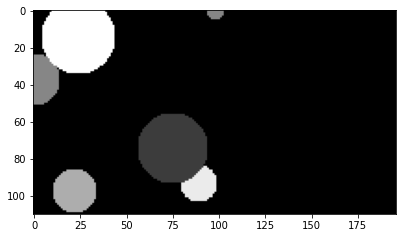

generation = 0  since found better = 0
run_time =  0.26592516899108887


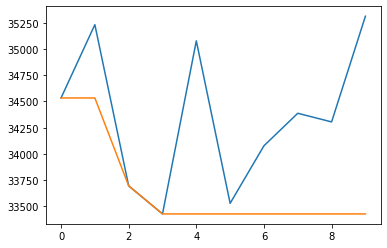

In [123]:
# Get shape of original image
height, width = gray.shape[0], gray.shape[1]
print('w:', width, 'h:', height)

# ------- Circle parameters -------------
number_of_cirles = 7
min_circle_radius = 5
max_circle_radius = 40

# ------- Evoltuion paramters -----------

rf_r = 10                                # <-- ennyivel tudja módosítani +/- az _r értékét a mutációval  ---> row pozíció (vagy y cord) módosítója
rf_c = 30                                # <-- ennyivel tudja módosítani +/- az _c értékét a mutációval  ---> col pozíció (vagy x cord) módosítója
rf_rr = 3                                # <-- ennyivel tudja módosítani +/- az _rr és a _cr érétkét a mutációval    ---> radius módosítója
rf_v = 0.25                              # <-- ennyivel tudja módosítani +6- a  _value értékét

# ------- Evoltuion paramters -----------
print_every_solution_result  = False


# ------- Run evolution ----------------

evolution = Evolution(original_image = gray)

evolution.setup_evolution(rf_r, rf_c, rf_rr, rf_v)

evolution.init_solution(number_of_cirles, min_circle_radius, max_circle_radius)

evolution.run_evolution(immediately_update = True, generation = 2, population = 5, selection_rate = 1.0, show_time = 10)

evolution.show_history()

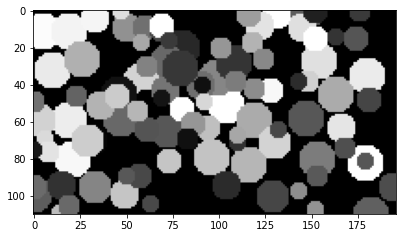

generation = 180  since found better = 44
Found Better Solution in Generateion 195 at Solution 2  ---> Err. = 21507.44144
run_time =  10.446080923080444


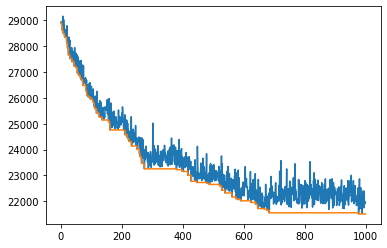

In [124]:
# Get shape of original image
height, width = gray.shape[0], gray.shape[1]
print('w:', width, 'h:', height)

# ------- Circle parameters -------------
number_of_cirles = 100
min_circle_radius = 5
max_circle_radius = 10

# ------- Evoltuion paramters -----------

rf_r = 10                                # <-- ennyivel tudja módosítani +/- az _r értékét a mutációval  ---> row pozíció (vagy y cord) módosítója
rf_c = 5                                 # <-- ennyivel tudja módosítani +/- az _c értékét a mutációval  ---> col pozíció (vagy x cord) módosítója
rf_rr = 3                                # <-- ennyivel tudja módosítani +/- az _rr és a _cr érétkét a mutációval    ---> radius módosítója
rf_v = 0.25                              # <-- ennyivel tudja módosítani +6- a  _value értékét

# ------- Evoltuion paramters -----------
print_every_solution_result  = False


# ------- Run evolution ----------------

evolution = Evolution(original_image = gray)

evolution.setup_evolution(rf_r, rf_c, rf_rr, rf_v)

evolution.init_solution(number_of_cirles, min_circle_radius, max_circle_radius)

evolution.run_evolution(immediately_update = False,
                        generation = 200,
                        population = 5,
                        selection_rate = 0.1,
                        z_order_selection_rate = 0.0,
                        z_ordered = True,
                        show_time = 20)

evolution.show_history()

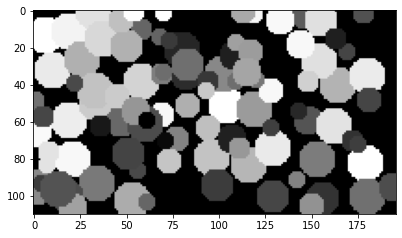

generation = 80  since found better = 2
Found Better Solution in Generateion 82 at Solution 3  ---> Err. = 20066.41172
Found Better Solution in Generateion 83 at Solution 1  ---> Err. = 19792.09836
Found Better Solution in Generateion 92 at Solution 4  ---> Err. = 19782.72199
Found Better Solution in Generateion 95 at Solution 3  ---> Err. = 19743.66123
Found Better Solution in Generateion 97 at Solution 1  ---> Err. = 19720.73978
run_time =  5.136746644973755


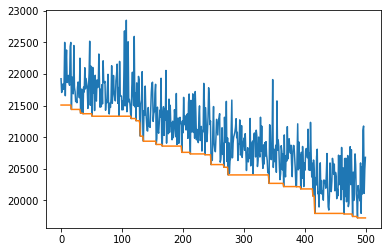

In [125]:
# Ha tovább akarom tanítani a modellt, akkor semmi mást nem kell tennem, csak
# ismét meghívnom a ... és nem szabad meghívni az init_solution metodust

# ------- Run evolution ----------------

evolution.run_evolution(immediately_update = True, generation = 100, population = 5, selection_rate = 0.1, show_time = 20)

evolution.show_history()

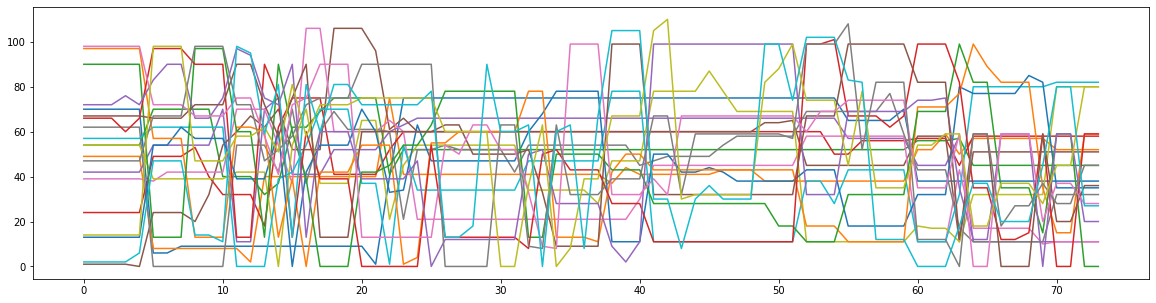

In [126]:
# evolution.best_solution_history

len(evolution.best_solution_history)

evolution.best_solution_history[0]

elso_kor_r = []
elso_kor_c = []
elso_kor_v = []

korok_r = []

num_of_ind = 20                                                     # <- len(evolution.best_solution_history[i])

for i in range(len(evolution.best_solution_history)):               # <- minden best solutionon végig megyünk
    korok_r_in_gen = []
    # for j in range(2): # len(evolution.best_solution_history[i])  # <- minden körön végig megyünk
    for j in range(num_of_ind):                                     # <- minden körön végig megyünk
        evolution.best_solution_history[i][j]                       # <- ez egy konkrét kör
        kor = evolution.best_solution_history[i][j]
        _r = kor.get('_r')                                          # <- _r a sor
        _c = kor.get('_c')                                          # <- _c az oszlop
        _v = kor.get('_value')                                      # <- _v a pixel value
        _rr = kor.get('_rr')                                        # <- _rr a radius
        _cr = kor.get('_cr')                                        # <- _cr a radius (igen kettő van de egyenlőek)
        elso_kor_r.append(_r)
        elso_kor_c.append(_c)
        elso_kor_v.append(_v)
        
        korok_r_in_gen.append(_r)
    korok_r.append(korok_r_in_gen)

len(evolution.best_solution_history[0][0])      # <- list
type(evolution.best_solution_history[0][0])     # <- dict

_korok_r = []
for j in range(num_of_ind):
    _kor_r = []
    for i in range(len(korok_r)):
        _r = korok_r[i][j]
        _kor_r.append(_r)
    _korok_r.append(_kor_r)

# print(_korok_r)

plt.figure(figsize=(20, 5))
for i in range(num_of_ind):
    plt.plot(_korok_r[i])
plt.show()

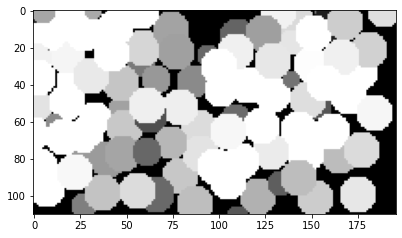

generation = 10  since found better = 10
run_time =  1.4034063816070557


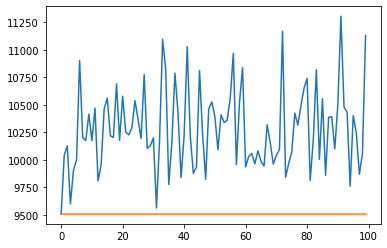

In [127]:
# Korábban 50000 lépésben tovább tanítottam a modelt és egy nagyon jó eredményt kaptam.

# Ahelyett, hogy most újra lefuttatnám betöltöm azt a modelt

# ------- Run evolution ----------------

# evolution.run_evolution(immediately_update = True, generation = 50000, population = 5, selection_rate = 0.1, show_time = 200)

evolution.load_archived_model()

# Picit rátanítunk, hogy előáljon néhány adat

evolution.run_evolution(immediately_update = False, generation = 20, population = 5, selection_rate = 0.1, show_time = 10)

evolution.show_history()

## Elképesztően jó!

Ha távolról megnézed a képet látszik, hogy tök jól megtalálta hova kell tennie a pontokat, hogy kiemelje az arc részleteit, szem.

## Müködik-e a megoldás ha változtatok a lehetőségeken

Vajon működik-e akkor is, ha felül irom az evolúció egyes beállításait és úgy tanítom tovább.

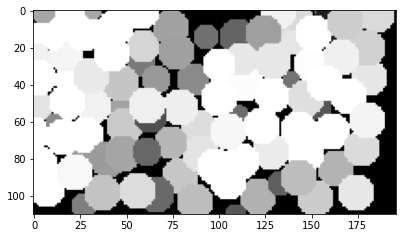

generation = 9  since found better = 0
run_time =  2.6268444061279297


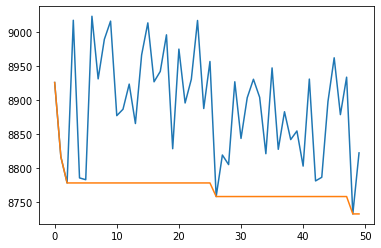

In [128]:

# ------- Circle parameters -------------                                       # <-- ezek voltak korábban, így lett inicializálva init_solution
number_of_cirles = 100
min_circle_radius = 5
max_circle_radius = 10

# ------- Modify Circle ----------------                                        # <-- módosítom ezeket az értékeket (!) a number_of_circle-t nem
evolution.min_circle_radius = 5
evolution.max_circle_radius = 10 # 200

# ------- Modify paramters --------------

rf_r = 1      # 10 -> 12                # <-- ennyivel tudja módosítani +/- az _r értékét a mutációval  ---> row pozíció (vagy y cord) módosítója
rf_c = 1      # 5  -> 10                # <-- ennyivel tudja módosítani +/- az _c értékét a mutációval  ---> col pozíció (vagy x cord) módosítója
rf_rr = 1     # 3  -> 10                # <-- ennyivel tudja módosítani +/- az _rr és a _cr érétkét a mutációval    ---> radius módosítója
rf_v = 0.01   # 0.25                             # <-- ennyivel tudja módosítani +6- a  _value értékét

evolution._rf_r = rf_r
evolution._rf_c = rf_c
evolution._rf_rr = rf_rr
evolution._rf_v = rf_v

# ------- Load archived model -----------

evolution.load_archived_model()

# ------- Run evolution -----------------

evolution.run_evolution(immediately_update = False, generation = 10, population = 5, selection_rate = 0.1, show_time = 1)

evolution.show_history()

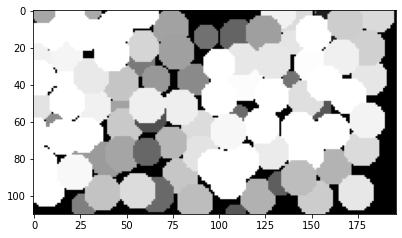

generation = 99  since found better = 81
run_time =  31.33360767364502


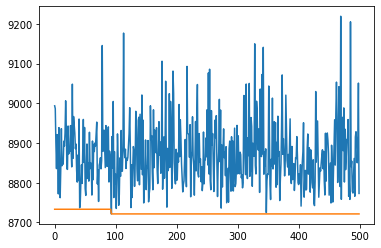

In [129]:
# ------- Run evolution ----------------

# ------> Kapcsoljuk be a Z-order swapot

# evolution.run_evolution(immediately_update = False, generation = 200, population = 5, selection_rate = 0.1, show_time = 20)

evolution.run_evolution(immediately_update = False, generation = 100, population = 5, selection_rate = 0.1, z_order_selection_rate = 1.0, show_time = 1)

evolution.show_history()

## Z-Order Selection Teszt

Szinte minden mutációs érétéket a lehető legkissebre veszünk, hogy csak a körök sorrendjével tudjon játszani.

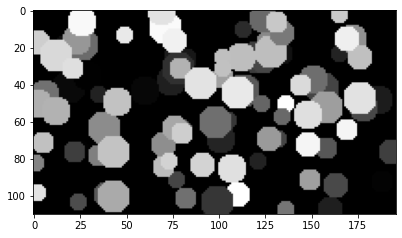

generation = 180  since found better = 3
Found Better Solution in Generateion 187 at Solution 1  ---> Err. = 27526.69771
Found Better Solution in Generateion 194 at Solution 0  ---> Err. = 27526.63915
run_time =  17.880510091781616


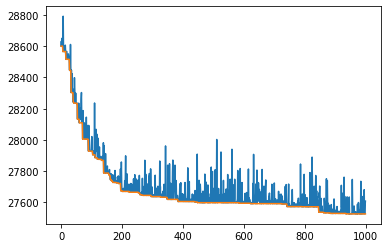

In [130]:
# Get shape of original image
height, width = gray.shape[0], gray.shape[1]
print('w:', width, 'h:', height)

# ------- Circle parameters -------------
number_of_cirles = 100
min_circle_radius = 5
max_circle_radius = 10

# ------- Evoltuion paramters -----------

rf_r = 1                                 # <-- ennyivel tudja módosítani +/- az _r értékét a mutációval  ---> row pozíció (vagy y cord) módosítója
rf_c = 1                                 # <-- ennyivel tudja módosítani +/- az _c értékét a mutációval  ---> col pozíció (vagy x cord) módosítója
rf_rr = 1                                # <-- ennyivel tudja módosítani +/- az _rr és a _cr érétkét a mutációval    ---> radius módosítója
rf_v = 0.0025                            # <-- ennyivel tudja módosítani +6- a  _value értékét

# ------- Evoltuion paramters -----------
print_every_solution_result  = False


# ------- Run evolution ----------------

evolution = Evolution(original_image = gray)

evolution.setup_evolution(rf_r, rf_c, rf_rr, rf_v)

evolution.init_solution(number_of_cirles, min_circle_radius, max_circle_radius)

evolution.run_evolution(immediately_update = False, generation = 200, population = 5, selection_rate = 0.001, z_order_selection_rate = 1.0, show_time = 20)

evolution.show_history()

In [131]:
def show_indv_history():
    # evolution.best_solution_history

    len(evolution.best_solution_history)

    evolution.best_solution_history[0]

    korok_r = []
    korok_c = []

    num_of_ind = 20                                                     # <- len(evolution.best_solution_history[i])

    for i in range(len(evolution.best_solution_history)):               # <- minden best solutionon végig megyünk
        korok_r_in_gen = []
        korok_c_in_gen = []
        # for j in range(2): # len(evolution.best_solution_history[i])  # <- minden körön végig megyünk
        for j in range(num_of_ind):                                     # <- minden körön végig megyünk
            evolution.best_solution_history[i][j]                       # <- ez egy konkrét kör
            kor = evolution.best_solution_history[i][j]
            _r = kor.get('_r')                                          # <- _r a sor
            _c = kor.get('_c')                                          # <- _c az oszlop
            _v = kor.get('_value')                                      # <- _v a pixel value
            _rr = kor.get('_rr')                                        # <- _rr a radius
            _cr = kor.get('_cr')                                        # <- _cr a radius (igen kettő van de egyenlőek)

            korok_r_in_gen.append(_r)
            korok_c_in_gen.append(_c)
        korok_r.append(korok_r_in_gen)
        korok_c.append(korok_c_in_gen)

    len(evolution.best_solution_history[0][0])      # <- list
    type(evolution.best_solution_history[0][0])     # <- dict

    _korok_r = []
    _korok_c = []
    for j in range(num_of_ind):
        _kor_r = []
        _kor_c = []
        for i in range(len(korok_r)):
            _r = korok_r[i][j]
            _c = korok_c[i][j]
            _kor_r.append(_r)
            _kor_c.append(_c)
        _korok_r.append(_kor_r)
        _korok_c.append(_kor_c)

    # print(_korok_r)
    # print(_korok_c))

    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 10))
    for i in range(num_of_ind):
        cv = _korok_r[i][0] / 200
        ax0.plot(_korok_r[i], c=(1,cv,cv,1))
        ax1.plot(_korok_c[i], c=(cv,cv,cv,1))
    plt.show()

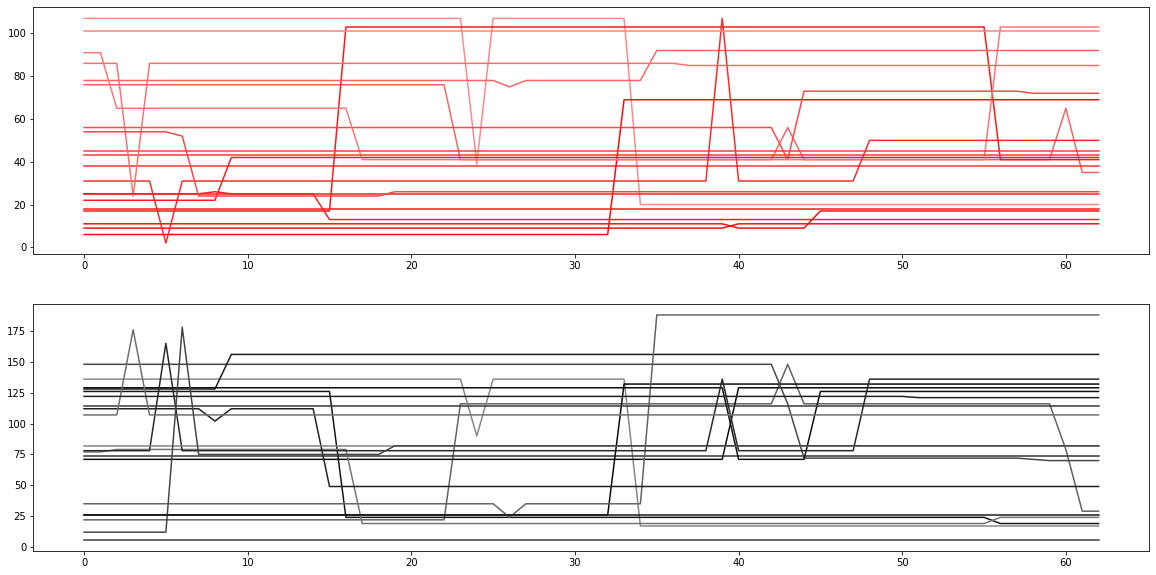

In [132]:

show_indv_history()


## Nézzük meg, hogy Z-order variálásával tudunk-e a best modellen javítani?

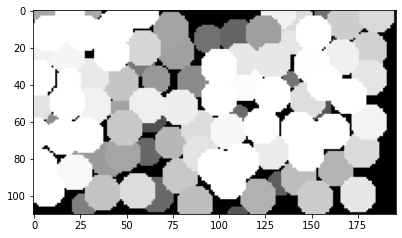

generation = 190  since found better = 5
run_time =  23.425233125686646


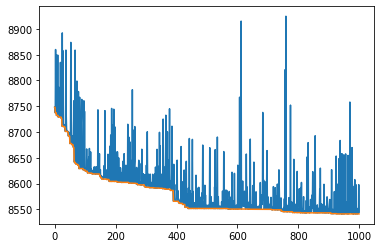

In [133]:
# Korábban 50000 lépésben tovább tanítottam a modelt és egy nagyon jó eredményt kaptam.

# ------- Load evolution ---------------

evolution.load_archived_model()

# Picit rátanítunk, hogy előáljon néhány adat

evolution.run_evolution(immediately_update = False,
                        generation = 200,
                        population = 5,
                        selection_rate = 0.000001,                              # <-- set almost zero
                        z_order_selection_rate = 1.0,
                        show_time = 10)

evolution.show_history()

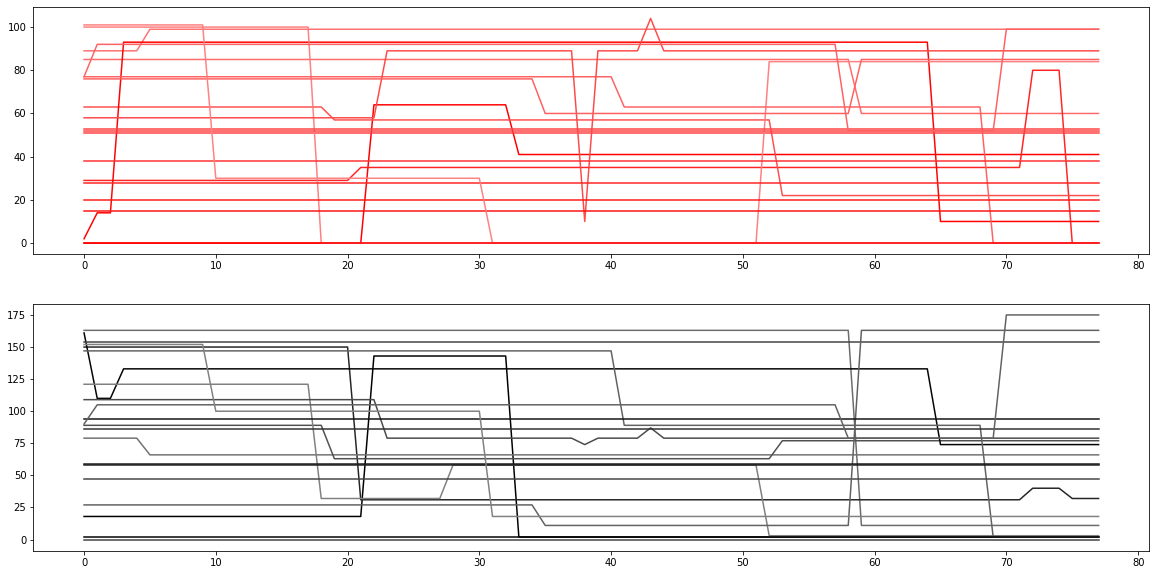

In [134]:
show_indv_history()

## Nézzük meg hogy a Z-order variálásával és további mutációval tudunk-e a modelen javítani?

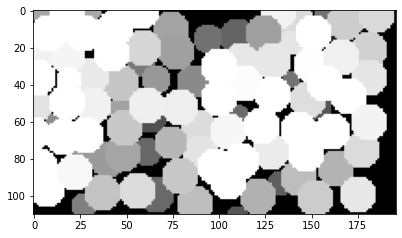

generation = 190  since found better = 20
Found Better Solution in Generateion 192 at Solution 4  ---> Err. = 8533.94382
Found Better Solution in Generateion 193 at Solution 4  ---> Err. = 8533.19994
run_time =  22.378716230392456


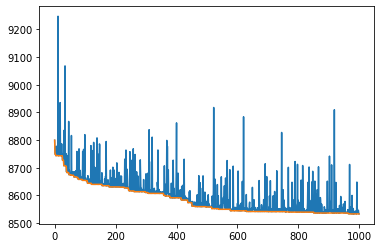

In [135]:

# ------- Modify paramters --------------

rf_r = 10     # 10 -> 12                # <-- ennyivel tudja módosítani +/- az _r értékét a mutációval  ---> row pozíció (vagy y cord) módosítója
rf_c = 5      # 5  -> 10                # <-- ennyivel tudja módosítani +/- az _c értékét a mutációval  ---> col pozíció (vagy x cord) módosítója
rf_rr = 3     # 3  -> 10                # <-- ennyivel tudja módosítani +/- az _rr és a _cr érétkét a mutációval    ---> radius módosítója
rf_v = 0.25   # 0.25                             # <-- ennyivel tudja módosítani +6- a  _value értékét

evolution._rf_r = rf_r
evolution._rf_c = rf_c
evolution._rf_rr = rf_rr
evolution._rf_v = rf_v

# ------- Load archived model -----------

evolution.load_archived_model()

# Picit rátanítunk, hogy előáljon néhány adat

evolution.run_evolution(immediately_update = False,
                        generation = 200,
                        population = 5,
                        selection_rate = 0.000001,                                   # <-- use as was in the orignal evolution
                        z_order_selection_rate = 1.0,
                        show_time = 10)

evolution.show_history()

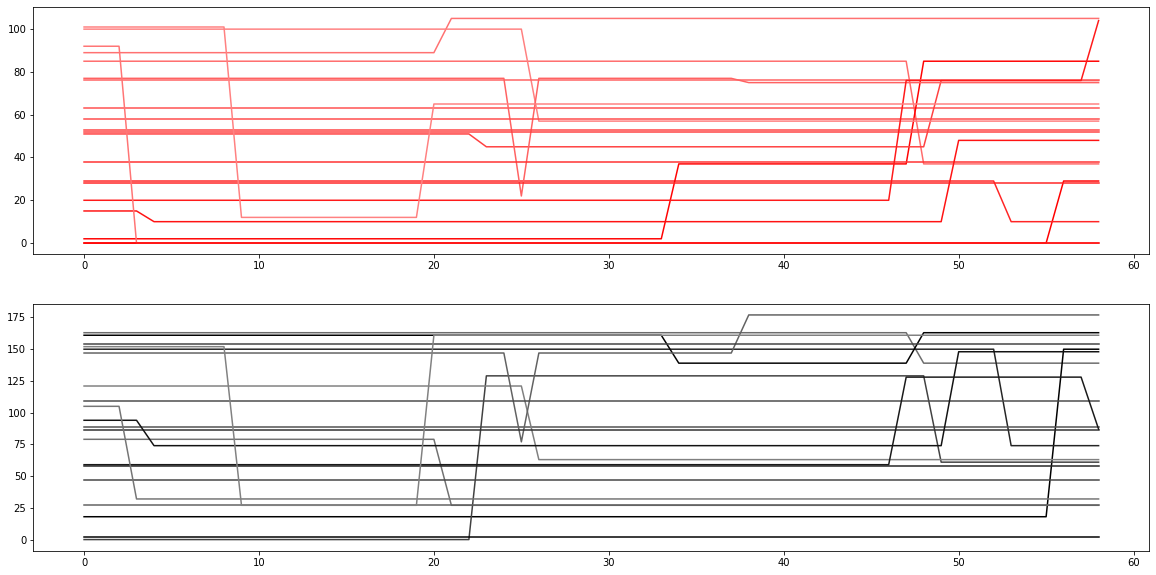

In [136]:
show_indv_history()

## Érdekes

Ha a Z-order mellett a egy a többi paraméter mutációját is használtuk, akkor a feltanult modellen már nem volt képes javítani, ha viszont csak a Z-ordert mutáltuk akkor jelentősen javult.

(?) Programhiba?

Nem valószínű. Egyszerűen az van, hogy a Z-order mutáció a mutált értékeken fut le. Úgy látszik, hogy az többet ront a jó megoldáson mint ammennyit a Z-order javítana a tisztán legjobb megoldáson.

Ez azért érdekes mert lehet, hogy a Z-order-t úgy kéne mutálni, hogy ne legyen mutáció a többi paraméterben. Tehát ha van Z-order mutáció akkor ne legyen mutálva a többi. Ez viszont azért nehézkes, mert ha a Z-order mindíg variálódik, akkor a többi soha sem fog. Na mindegy.

1. **Tantsuk tovább a modelt mindkét mutációval**
2. **Majd engedjük, hogy nagyobb köröket is létrehozzon és nézzük meg milyen eredményre jut.**

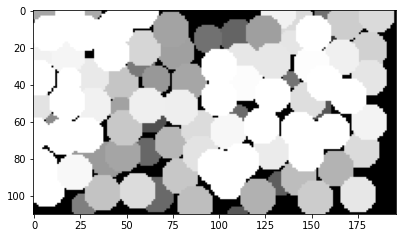

generation = 190  since found better = 0
Found Better Solution in Generateion 195 at Solution 1  ---> Err. = 8501.05709
run_time =  21.28739833831787


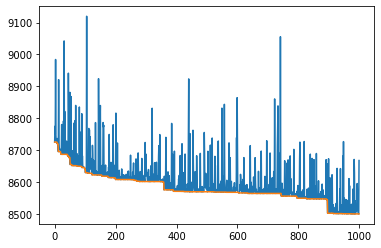

In [137]:

# ------- Modify paramters --------------

rf_r = 10     # 10 -> 12                # <-- ennyivel tudja módosítani +/- az _r értékét a mutációval  ---> row pozíció (vagy y cord) módosítója
rf_c = 5      # 5  -> 10                # <-- ennyivel tudja módosítani +/- az _c értékét a mutációval  ---> col pozíció (vagy x cord) módosítója
rf_rr = 3     # 3  -> 10                # <-- ennyivel tudja módosítani +/- az _rr és a _cr érétkét a mutációval    ---> radius módosítója
rf_v = 0.25   # 0.25                             # <-- ennyivel tudja módosítani +6- a  _value értékét

evolution._rf_r = rf_r
evolution._rf_c = rf_c
evolution._rf_rr = rf_rr
evolution._rf_v = rf_v

# ------- Load archived model -----------

evolution.load_archived_model()

# Picit rátanítunk, hogy előáljon néhány adat

evolution.run_evolution(immediately_update = False,
                        generation = 200,
                        population = 5,
                        selection_rate = 0.001,                                   # <-- set smaller
                        z_order_selection_rate = 1.0,
                        show_time = 10)

evolution.show_history()

## Conclusion about Z-order

Az összességében már most elmondható, hogy a Z-order bevezetése biztos, hogy jó ötlet volt.

## Engedjük növekedni a köröket a archiv modellen

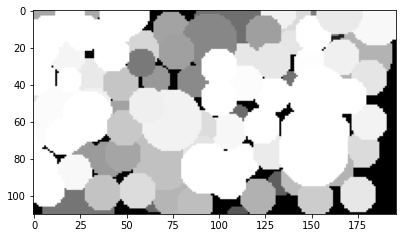

generation = 190  since found better = 0
Found Better Solution in Generateion 192 at Solution 3  ---> Err. = 7519.33113
Found Better Solution in Generateion 193 at Solution 0  ---> Err. = 7511.81429
Found Better Solution in Generateion 194 at Solution 3  ---> Err. = 7511.2844
Found Better Solution in Generateion 197 at Solution 4  ---> Err. = 7511.10718
run_time =  21.690019607543945


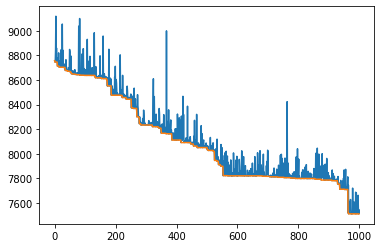

In [138]:

# ------- Circle parameters -------------
number_of_cirles = 100
min_circle_radius = 5
max_circle_radius = 20    # 10 -> 20    # <-- nagyobb köröket engedünk elérni

evolution.max_circle_radius = max_circle_radius

# ------- Modify paramters --------------

rf_r = 10     # 10 ->                   # <-- nem változtattuk
rf_c = 5      # 5  ->                   # <-- nem változtattuk
rf_rr = 10    # 3  -> 10                # <-- nagyobb mértékben tudja változtatni a körök mértékét
rf_v = 0.25   # 0.25                    # <-- nem változtattuk

evolution._rf_r = rf_r
evolution._rf_c = rf_c
evolution._rf_rr = rf_rr
evolution._rf_v = rf_v

# ------- Load archived model -----------

evolution.load_archived_model()

# Picit rátanítunk, hogy előáljon néhány adat

evolution.run_evolution(immediately_update = False,
                        generation = 200,
                        population = 5,
                        selection_rate = 0.001,                                   # <-- set smaller
                        z_order_selection_rate = 1.0,
                        show_time = 10)

evolution.show_history()

## Conclusion about parameters

Nyilván az arányokon is van a hangsúly. Például nem engedhetem, hogy a körök méretén nagyon nagy mértékben tudjon mutálni, magyarul, hogy nagy lépésekben haladjon mert lehet, hogy hirtelen talál egy jobb megoldást, de utána nem tud majd rajta finoman módosítani.

**Tehtát a következtetés:**

hogy egy adott paraméter értékét nem szabad nagyon nagy mértékben mutálni.

Tehát a mutációs paraméterek `(rf_r, rf_c, rf_rr, rf_value)` ne legyen nagyon nagyok. Ezzel lehet, hogy hírtelen tudom javítani az eredményt vagyis úgy tűnhet, hogy kevesebb lépéssel jobb eredményt érek el de utána befagy a tanulás, minta több lépésben de kisebb változtatásokkal haladok.


## Játszunk egy kicsit a Z-ordered sort bekapcsolásával

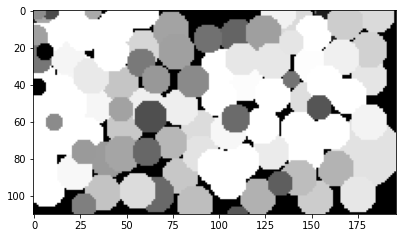

generation = 10  since found better = 1
Found Better Solution in Generateion 12 at Solution 4  ---> Err. = 9414.73708
Found Better Solution in Generateion 15 at Solution 2  ---> Err. = 9374.80554
Found Better Solution in Generateion 16 at Solution 2  ---> Err. = 9326.42597
Found Better Solution in Generateion 17 at Solution 2  ---> Err. = 9280.00834
Found Better Solution in Generateion 17 at Solution 4  ---> Err. = 9241.81104
run_time =  1.3766238689422607


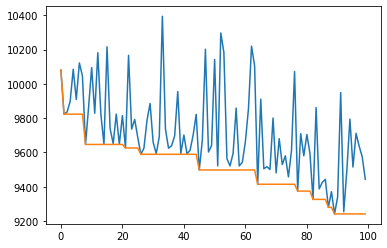

In [139]:

# ------- Circle parameters -------------

evolution.max_circle_radius = 300     # 50 -> 200  # <-- még nagyobb köröket engedünk elérni

# ------- Modify paramters --------------

evolution._rf_r  = 10     # 10 ->                   # <-- nem változtattuk
evolution._rf_c  = 10     # 10 ->                   # <-- nem változtattuk
evolution._rf_rr = 10     # 10 ->                   # <-- nagyobb mértékben tudja változtatni a körök mértékét
evolution._rf_v  = 0.10   # 0.25                    # <-- nem változtattuk


# ------- Load archived model -----------

evolution.load_archived_model()

# ------- Run evolution -----------------

evolution.run_evolution(immediately_update = False,
                        generation = 20,
                        population = 5,
                        selection_rate = 0.02,                                    # <-- set bigger 0.001 -> 0.1
                        z_order_selection_rate = 0.0,                             # <-- ha a z_oredered = True akkor ez legyen 0
                        z_ordered = True,
                        show_time = 10)

evolution.show_history()

## Csináljunk egy teljes evolúciós tanítást a Z-ordered bekapcsolásával

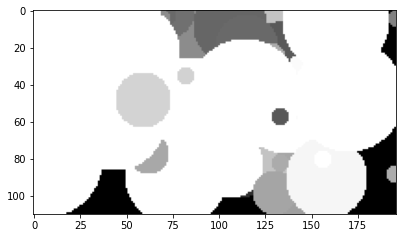

generation = 1980  since found better = 12
run_time =  149.55238938331604


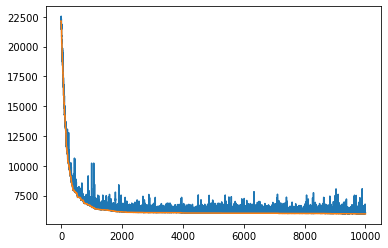

In [140]:

# ------- Circle parameters -------------

number_of_cirles  = 100
min_circle_radius = 5
max_circle_radius = 30

# ------- Modify paramters --------------

rf_r  = 5     # 10 ->                    # <-- nem változtattuk
rf_c  = 5     # 10 ->                    # <-- nem változtattuk
rf_rr = 3     # 10 ->                    # <-- nagyobb mértékben tudja változtatni a körök mértékét
rf_v  = 0.25   # 0.25                    # <-- nem változtattuk


evolution = Evolution(original_image = gray)

evolution.setup_evolution(rf_r, rf_c, rf_rr, rf_v)

evolution.init_solution(number_of_cirles, min_circle_radius, max_circle_radius)


# ------- Run evolution -----------------

evolution.run_evolution(immediately_update = False,
                        generation = 2000,
                        population = 5,
                        selection_rate = 0.21,                                     # <-- set bigger 0.001 -> 0.1
                        z_order_selection_rate = 0.2,                              # <-- ha a z_oredered = True akkor ez legyen 0
                        z_ordered = False,
                        show_time = 20)

evolution.show_history()


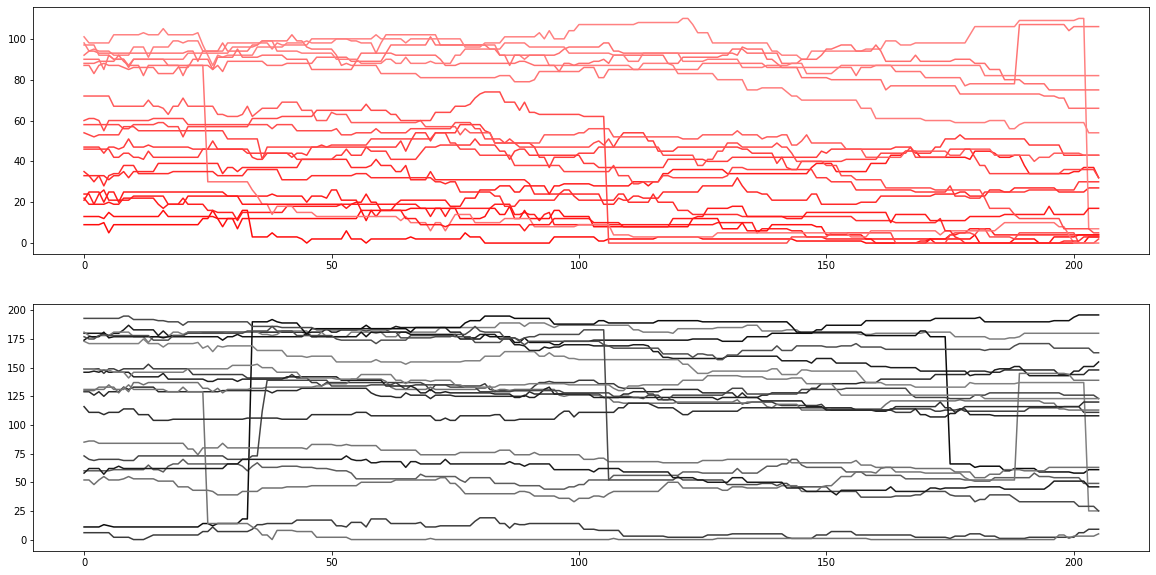

In [141]:
show_indv_history()

## Ugyan az mint az ereditiben, hogy össze tudjam vetni

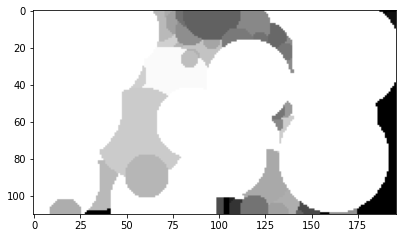

generation = 19980  since found better = 328
run_time =  3567.0839219093323


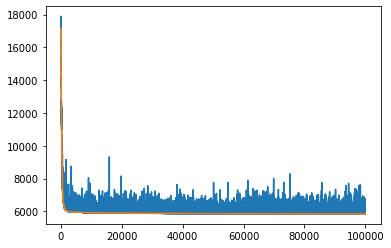

In [239]:

# ------- Circle parameters -------------

number_of_cirles  = 200
min_circle_radius = 5
max_circle_radius = 30

# ------- Modify paramters --------------

rf_r  = 10    # 10 ->                    # <-- nem változtattuk
rf_c  = 5     # 10 ->                    # <-- nem változtattuk
rf_rr = 3     # 10 ->                    # <-- nagyobb mértékben tudja változtatni a körök mértékét
rf_v  = 0.25   # 0.25                    # <-- nem változtattuk


evolution = Evolution(original_image = gray)

evolution.setup_evolution(rf_r, rf_c, rf_rr, rf_v)

evolution.init_solution(number_of_cirles, min_circle_radius, max_circle_radius)

evolution.save_image = True
# aaaaaa

# ------- Run evolution -----------------

evolution.run_evolution(immediately_update = False,
                        generation = 20000,
                        population = 5,
                        selection_rate = 0.1,                                     # <-- set bigger 0.001 -> 0.1
                        z_order_selection_rate = 0.2,                              # <-- ha a z_oredered = True akkor ez legyen 0
                        z_ordered = False,
                        show_time = 20)

evolution.show_history()


In [240]:
import pickle

with open('best_solution_200.pkl', 'wb') as f:
  pickle.dump(evolution.best_solution, f)

files.download('best_solution_200.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Todo

# ezt az alsó szutykot berakni az osztályba hogy ne is lássam


# az juott még eszembe, hogy lehet, hogy a value értékét nem is nekem kéne adni
# hanem a kiolvasott képbből venném ki az átlagot
# magyarul ahol az elipis(r,c) pixel intenzitását olvasnám ki az eredeit képből és akkor nem kéne variálnom a value-val

# ugyanis nagyon gyanús nekem, hogy miért fehéredit ki a kép olyan részeken ahol szeirntem nem kéne neki ennyire világosnak lennie-

# szóval át kéne nézni ezt is hogy ahol a hibát számolja ott jól jön-e ki a matek

In [241]:
# !rm *.mp4
# !ffmpeg -r 24 -pattern_type glob -i "image*.png" -vcodec libx264 -crf 25 -pix_fmt yuv420p mozi.mp4

# El szokot hasalni és nem látszik a hiba, ha a kép mérete közül bármelyik nem osztható kettővel.

import glob
from google.colab import files

def create_animated_mp4(filter = 'image*.png', prefix = 'movie_', framerate = 10):
  output = prefix + filter[0:filter.find('*')] + '.mp4'
  os.system('rm ' + output)
  if( len(glob.glob(filter)) > 0 ):
    os.system('ffmpeg -r ' + str(framerate) + ' -pattern_type glob -i "' + filter + '" -vcodec libx264 -crf 25 -pix_fmt yuv420p ' + output)

    print('ok')

  else:
    # print('Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk')
    print('skipped')
    pass

In [242]:
create_animated_mp4('image*.png', 'movie_', framerate=10)

ok


In [243]:
%%capture
! rm *.zip
! zip -0 ani.zip *.mp4

In [244]:
files.download('ani.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [230]:
!rm *.png
!rm *.pkl.*
!rm *.mp4

rm: cannot remove '*.pkl.*': No such file or directory


## Gondolatok

Az valahogy kontrollálni kéne, hogy ne engedjen nagyon sok nagyon nagy kört.

Sőt tovább megyek : Fel kéne állítani valamilyen kapcsolatot a körök mérete és a Z-order között.

A megfontolás és a logika ugyanis az, hogy egy nagyobb kör minek legyen elől ha az úgyis kitakar egy csomó kisebb kört.

Ezért megírni és implementálni azt a módszert, ami a listát a körök mérete alapján rendezi és utána csinálja meg a képet és számolja ki a hibát.

Z-ordered-list lesz a kapcsoló neve.

## Fun with Neural Network

Azonnal csinálni egy save model segédosztályt - itt akár még kívülre ideiglenesen, aztán a követekező verzióban átírni az osztályon belüljre.

Utána az következik, hogy csinálok egy neurális hálót, ahol egyetelen egy sor (megfigyelési eset, observation, row) van. A bemenete az eredeti kép pixel ponjtia kilapítva. A célváltozó peidg a mostani evolució végén előállított pontok. Méghozzá úgy, hogy r, c, rr, cc és a listában elfoglalt poziciójuk.
Ez is egy soros kilapított vektor.

In [ ]:
print(type(evolution.best_solution))

import pickle

with open('best_solution.pkl', 'wb') as f:
  pickle.dump(evolution.best_solution, f)

with open('best_solution.pkl', 'rb') as f:
  loaded_model = pickle.load(f)

print(type(loaded_model))
print(len(loaded_model))

with open('evolution.pkl', 'wb') as f:
  pickle.dump(evolution, f)

with open('evolution.pkl', 'rb') as f:
  loaded_evolution = pickle.load(f)

print(type(loaded_evolution))


<class 'list'>
<class 'list'>
100
<class '__main__.Evolution'>


In [ ]:
import json

json.dump(evolution.best_solution, open('best_solution.json', 'w') )

json_best_solution = json.load( open('best_solution.json') )

## A kísérlet, hogy működik-e az elképzelésem.

Miszerint az összes képpont alapján becsüljük az köröket és azok minden paraméterét.

In [ ]:
input = gray.flatten()

print(input.shape)

input.reshape(1, input.shape[0])

print(input.shape)

# ki kell csomagolni a best_solution-t egy nyomorult vecotrba

vector = []
for i in evolution.best_solution:
  # print(i)
  vector.append(i.get('_r'))
  vector.append(i.get('_c'))
  vector.append(i.get('_rr'))
  vector.append(i.get('_cr'))
  vector.append(i.get('_value'))

print(len(vector))

target = np.array(vector)
print(target.shape)

(21867,)
(21867,)
500
(500,)


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

target_scaler = MinMaxScaler(feature_range=(-1, 1))

target_vector = target_scaler.fit_transform(target.reshape(-1, 1))
target_vector = target_vector.reshape(1, -1)

print('target_vector.shape = ', target_vector.shape)
print('target_vector.min() = ', target_vector.min())
print('target_vector.max() = ', target_vector.max())

# A bemenet nem a pixelek értéke hanem az x és az y koordináta (ráadásul kilapítva)
# Lehet úgy kódolni, hogy x1, y1, x2, y2, ....
# Vagy úgy, hogy elöször az összes x1, x2, ... majd az összes y1, y2

# A lényeg, hogy ez nem egy olyan vektor lesz ami úgy áll elő hogy 444 * 778
# Hanem egy olyen vektor ami 444 + 778
# És mindegyik értéke 1-es
# Tehát np.ones(444 + 778)
# De egyébként meg lehetne csinálni szorzatra is (444*778)
# A lényeg akkor is az, hogy az értékei 1-esek.

input_vector = np.ones((width + height)).reshape(1, -1)
print('input_vector.shape  = ', input_vector.shape)

model = MLPRegressor(hidden_layer_sizes=(15, 5), 
                     activation='tanh', 
                     solver='adam', 
                     batch_size='auto', 
                     max_iter=200, 
                     shuffle=False, 
                     random_state=1, 
                     validation_fraction=0.0, 
                     n_iter_no_change=99999)

model.fit(input_vector, target_vector)

target_vector.shape =  (1, 500)
target_vector.min() =  -1.0
target_vector.max() =  1.0
input_vector.shape  =  (1, 308)


MLPRegressor(activation='tanh', hidden_layer_sizes=(15, 5),
             n_iter_no_change=99999, random_state=1, shuffle=False,
             validation_fraction=0.0)

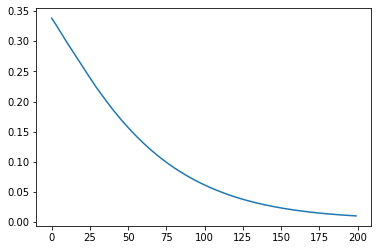

In [ ]:
plt.figure()
plt.plot(model.loss_curve_)
plt.show()

## Conclusion

Hogy igazából ez mire jó azt magam sem tudom.

De igazából ezt szerettem volna 'gyárilag' megtanítani egy neurális hálónak.<br>
Hogy nézd. Itt van a X coordináta tengely és itt van az Y coordináta tengely.<br>
Légyszíves állítsd elő a súlyokat úgy, hogy a kimeneten legyen 100 x 5 érték.<br>
Amely úgy áll elő hogy 100 kör és mindegyik körnek van 5 paramétere.<br>

Na erre nem jöttem rá hogyan lehetséges.<br>
Hogy milyen költség függvényt kellett volna írnom, hogy elő lehessen állítani.

Most, hogy vannak tanuló adataim persze lehetséges. De ezek az EA-val álltal elő.

Viszont ami érdekes, hogy most elvileg van egy olyan Neurális Hálóm, a hozzá tartozó súlyokkal. Amely elő tudja állítani a gömböket a megfelelő paraméterekkel.

Nézzük is meg, hogy sikerül-e rekonstruálnom az predict érték alapján a EA képet.

## Annyi hozadéka azért volt,

Hogy legalább azt megértettem milyen formában kéne reprezentálnom az adatokat.

1 sor, az input nem a value hanem a koordináta, a target pedig szintén 1 sor sok kimenettel, ahol az egyes kimeteke a körök és a körök paraméterei. Ami pedig visszatér az a teljes hiba. Tehát ha úgy tetszik a teljes költségfüggvény amit minimalizálni szeretnénk a körök alapján előállított kép és az eredeti közötti hiba négyzetösszegének gyöke.

## A kérdés ami ezek alapján felmerül,

Hogy lehetséges lenne-e előállítani ezt a költségfüggvényt valamelyik keretrendszerben.

A probléma ugyani az, hogy a Neurális Háló számára nem ez a költség függvény amit fent leírtam. Hanem a körök paramétereinek optimális és tényleges értéke közötti különbségének négyzet összeggének gyöke.

Tehát nézzük. A körünk (egy kör hibája)

$$L(r,c, rr, rc, v) = \sqrt{(\text{elipsis}(r, c, rr, rc, v) - \text{relal})^2}$$

Na most át kéne vezetni, hogy pontosan mit is csinál az $\text{elipsis}$ függvény. És ezek alapján kiszámolható az $L$ függvény deriváltja?

Kis kiegészítő olvasmányok a témakörben:
- https://realpython.com/gradient-descent-algorithm-python/
- https://ruder.io/optimizing-gradient-descent/
- https://cs231n.github.io/optimization-1/
- https://cs231n.github.io/neural-networks-3/

## ToDo

Párhuzamosítani a populációt szálakra - Pythonban megnézni, hogy müködik ez. Join.

Ha megvan akkor kivezetni a lehetséges szálák beállítását (->kontroll)

Ha megvan akkor csinálni az ELKH-ban egy 16VCPU 32GB gépet és lefuttatni.

Bevezetni a Crossover mechanizmust ( a két legjobb legyen kiválasztva )

Bevezetni, hogy csak a Populációs kör után csapja felül a Best_Solution-t

## Doc

### Válotzás a 03-hoz képest
Bevezetésre került a `selection_rate` aminek a hatására nem minden kör darag fog mutálódni egy indivídumban, hanem csak egy megadott hányaduk a megadott mértékben.

**Note:** Ha ez ez érték 1.0 akkor az olyan mintha nem lenne bevezetve ez a mechanizmus, vagyis minden kör darab mutálódni fog. Ha ez az érték 0.0 akkor semmilyen mutáció nincs, tehát mindíg az initial_solution-nal megegyező értéket fogonk kapni.

### Változás a 04-hez képest

Eddig ha a populáción belül bármelyik solution (egyed) jobb eredményt ért el mint az addigi legjobb akkor felülcsaptam a best_solution-t ami alapján a mutáltuk az új egyedeket.

Ez azt jelenti, hogy ha egy egyed jobb eredményt ért el mint az addigi legjobb akkor rögtön szülővé vált és a következő egyed már belőle származott.

Mindaddig ő a szűlő - belőle származtatjuk az utódokat - amig egy útód jobb eredményt nem ér el. Ekkor ő válik a szülővé és a korábbi szülő meghal.

Ezt az eljárást bekapcsolhatóvá teszem. Méghozzá úgy, hogy vagy ez a metódus van érvényben, vagy az, hogy a szülővé válás kiválasztása csak akkor megy végbe ammikor az összes - előre beállított számú utód - **population** - leszületett.

### Válotzás a 05-höz képest

Az Evolution osztályban kicsit átrendeztem, hogy melyik property field hol keletkezik. Továbbá tárolásra került a **best_solotion** és a **best_score** illetve az **init_solution metodustban** a kiinduló modelt társítoma a **best_solution** változóhoz. Ezáltal, ha már volt futása a példánynak akkor az evolution onnan folytatja ahol korábban abbagyta. Ha nem akkor **inti_solution** létrehozza a kiinduló állatpot, illetve felül csapja a korábbi **best_solution**-t és **best_scoret** értéket.

Továbbá ideiglenes kirtam, hogy elmentse a modelt. A következő verzióban ez már az osztály része lesz, csak most nem akartam újra tanítani a modelt, mert még elvégzek elötte egy kísérletet.

### Változás a 06-hoz képest

Beletettem azt, hogy ne írja felül egy generáción belül a következő gyerek genetikai kódját. Magyarul ne váljon szűlővé amig a többi testvére nem születik meg. Ugyanakkor benne hagytam mint választható opciót. Későbbi elmezésre.

```
# JoDeMiro
```

